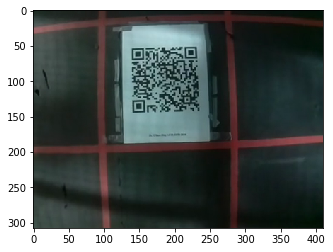

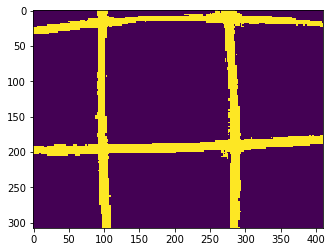

(204, 194)
-0.05235987750687581
15
(204, 194) (613, 172)


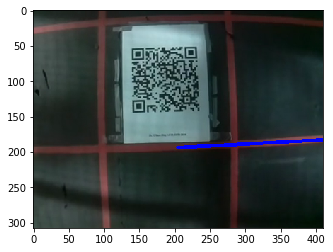

In [38]:
# %matplotlib notebook

import cv2
import numpy as np
import matplotlib.pyplot as plt
import py_grid_finder as gr
from math import cos, sin

video = cv2.VideoCapture("../Video/easy.mp4")
for i in range(20):
    result, image = video.read()

assert(result)
# image = cv2.flip(image, 0)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.figure()

lower_red1 = np.array([0, 30, 0])
upper_red1 = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

lower_red2 = np.array([170, 30, 0])
upper_red2 = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask = mask1 | mask2
plt.imshow(np.array(mask))

plt.show()

gf = gr.GridFinder(np.array(mask))
fl = gf.getFirstLine()
print(fl.getLineCenter())
print(fl.getAngle())
print(fl.getWidth())

p1 = (fl.getLineCenter().x, fl.getLineCenter().y)
p2 = (fl.getLineCenter().x + int(410 * cos(fl.getAngle())), int(fl.getLineCenter().y + 410 * sin(fl.getAngle())))
print (p1, p2)
cv2.line(image,p1,p2, (0, 0, 255), 2)
plt.close()
plt.imshow(image)
plt.show()